In [1]:
import boto3
import dask.dataframe as dd
from sagemaker import get_execution_role
import pandas as pd

role = get_execution_role()
bucket='tally-ai-dspt3'
folder = 'yelp-kaggle-raw-data'

print(f"S3 Bucket is {bucket}, and Folder is {folder}")

S3 Bucket is tally-ai-dspt3, and Folder is yelp-kaggle-raw-data


In order to use dask

1. Activate Conda Python 3 `source activate python3`
2. Install dask `conda install dask -y`
2. Install dask and s3fs `conda install s3fs -c conda-forge -y`

# Load Buisness Dataset

In [2]:
data_key = 'yelp_academic_dataset_business.json'
data_location = 's3://{}/{}/{}'.format(bucket, folder, data_key)
attributes = dd.read_json(data_location, lines=True)
attributes.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ
2,3554 Rue Notre-Dame O,None,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,None,1,45.479984,-73.580070,Felinus,H4C 1P4,5,5.0,QC
3,1015 Sharp Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,"{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",0,36.219728,-115.127725,Nevada House of Hose,89030,3,2.5,NV
4,4827 E Downing Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",1,33.428065,-111.726648,USE MY GUY SERVICES LLC,85205,26,4.5,AZ


# Load Reviews Dataset

In [1]:
data_key = 'yelp_academic_dataset_review.json'
data_location = 's3://{}/{}/{}'.format(bucket, folder, data_key)
reviews = dd.read_json(data_location, blocksize=32e6)
reviews.head()

NameError: name 'bucket' is not defined

# Load Users Dataset

In [8]:
data_key = 'yelp_academic_dataset_user.json'
data_location = 's3://{}/{}/{}'.format(bucket, folder, data_key)
users = dd.read_json(data_location, blocksize=32e6)
users.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.57,22,0,22,3,1,2,11,0,15,...,227,,14,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",225,Rafael,553,628,ntlvfPzc8eglqvk92iDIAw,2007-07-06 03:27:11
1,3.84,63,2,63,36,1,4,33,5,37,...,400,"2008,2009,2010,2011,2012,2013",27,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",316,Michelle,564,790,FOBRPlBHa3WPHFB5qYDlVg,2008-04-28 01:29:25
2,3.44,17,1,17,9,0,6,3,1,7,...,103,2010,5,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",125,Martin,60,151,zZUnPeh2hEp0WydbAZEOOg,2008-08-28 23:40:05
3,3.08,7,0,7,2,0,1,7,0,14,...,84,2009,6,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",160,John,206,233,QaELAmRcDc5TfJEylaaP8g,2008-09-20 00:08:14
4,4.37,31,1,31,8,1,9,22,31,28,...,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018",78,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",400,Anne,485,1265,xvu8G900tezTzbbfqmTKvA,2008-08-09 00:30:27


# Now we do EDA

In [2]:
# Next steps (Dask merge the datasets)
# Then filter for resturant
# Then export as .csv with restaurants
# Then upload to S3 Bucket

In order to use dask

1. Activate Conda Python 3 `source activate python3`
2. Install fastparquet `conda install -c conda-forge fastparquet'
3. Restart notebook kernal ensuring you are on conda_python3 environment

In [1]:
## Inital Load of Dask Files (missing columns run)

In [3]:
from fastparquet import ParquetFile

In [5]:
rru = dd.read_parquet('s3://tally-ai-dspt3/yelp-kaggle-raw-data/restaurants_reviews_users.parquet.gzip') 
             

In [6]:
rru.head()

,business_id,categories,city,latitude,longitude,name_x,review_count_x,stars_x,state,cool_x,...,average_stars,compliment_funny,compliment_writer,cool_y,elite,fans,funny_y,name_y,review_count_y,useful_y
index,,,,,,,,,,,,,,,,,,,,,
0,zRr45TrTgq8XAKwvjM0W_Q,"Restaurants, Chinese",Charlotte,35.217665,-80.792571,Vanloi Chinese Barbecue Restaurant,7,4.5,NC,2,...,2.68,16,36,196,,11,254,George,267,731
1,TTFbaLpIwrjFx7YIL2pbJA,"Middle Eastern, Restaurants, Mediterranean, Ve...",Matthews,35.128190,-80.702241,Kabab-Je Rotisserie & Grille,557,4.5,NC,4,...,2.68,16,36,196,,11,254,George,267,731
2,vSB8Yrz0KslzqnlPEBfqNA,"Taiwanese, Chinese, Restaurants",Charlotte,35.106970,-80.806871,Tomi Chinese Restaurant,9,4.0,NC,0,...,2.68,16,36,196,,11,254,George,267,731
3,LlSehKBi-vx0TE5x2Q4R_w,"Korean, Asian Fusion, Restaurants, Chicken Wings",Charlotte,35.090011,-80.858741,Bonchon - Pineville,143,4.0,NC,0,...,2.68,16,36,196,,11,254,George,267,731
4,9jM0wrm_GjJGw-XNdNrzPQ,"American (New), Cocktail Bars, Beer Bar, Night...",Matthews,35.118906,-80.719190,Jekyll & Hyde Taphouse and Grill,236,3.5,NC,2,...,2.68,16,36,196,,11,254,George,267,731


In [7]:
rru.columns

Index(['business_id', 'categories', 'city', 'latitude', 'longitude', 'name_x',
       'review_count_x', 'stars_x', 'state', 'cool_x', 'funny_x', 'review_id',
       'stars_y', 'text', 'useful_x', 'user_id', 'average_stars',
       'compliment_funny', 'compliment_writer', 'cool_y', 'elite', 'fans',
       'funny_y', 'name_y', 'review_count_y', 'useful_y'],
      dtype='object')

In [ ]:
##################################################################################################################################

# Initial EDA Info

# In order to use dask
1. Activate Conda Python 3 `source activate python3`
2. Install fastparquet `conda install -c conda-forge fastparquet'
3. Restart notebook kernal ensuring you are on conda_python3 environment

In [1]:
import boto3
import dask.dataframe as dd
from sagemaker import get_execution_role
from fastparquet import ParquetFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

role = get_execution_role()
bucket='tally-ai-dspt3'
folder = 'yelp-kaggle-raw-data'

In [2]:
#Loading data
data = 'final_combined.parquet.gzip'
data_location = 's3://{}/{}/{}'.format(bucket, folder, data)
df = dd.read_parquet(data_location)
df.head()


,address,business_id,categories,city,is_open,latitude,longitude,postal_code,state,stars_business,...,compliment_writer,elite,fans,friends,yelping_since,name_users,review_count_users,cool_users,funny_users,useful_users
index,,,,,,,,,,,,,,,,,,,,,
0,"3175 Rutherford Rd, Unit 47",E7v9sMJx4_Swx7VtymNt5Q,"Food Delivery Services, Food, Thai, Restaurants",Vaughan,1,43.827830,-79.538072,L4K 5Y6,ON,4.0,...,0,,0,None,2011-06-22 21:48:15,F,4,2,0,6
1,2777 Steeles Avenue W,4Lh1lZXTf0EoNqdzT60GPQ,"Coffee & Tea, Food, Ice Cream & Frozen Yogurt,...",Toronto,0,43.782160,-79.490430,M3J 3K5,ON,4.0,...,0,,0,None,2011-06-22 21:48:15,F,4,2,0,6
2,11155 S Eastern Ave,RPjBB_uhHQ4oxp39Jqm_HQ,"Sandwiches, Restaurants",Henderson,1,35.989803,-115.101597,89052,NV,3.0,...,0,,1,"CyOjizbfMb2hxkLIwE76Ow, MbZ0W9PjmlI7J9fs4SiNrw...",2013-02-08 21:54:49,Jake,50,17,17,53
3,"140 S Green Valley Pkwy, Ste 142",SR0Q2hAEMJ_m23O_x-khSQ,"Restaurants, American (New), Gluten-Free, Vege...",Henderson,0,36.022441,-115.083539,89012,NV,4.0,...,0,,1,"CyOjizbfMb2hxkLIwE76Ow, MbZ0W9PjmlI7J9fs4SiNrw...",2013-02-08 21:54:49,Jake,50,17,17,53
4,"8174 S Las Vegas Blvd, Ste 101",V_TxEdzeEs8P5nGPANOY7A,"Cocktail Bars, Gay Bars, Cafes, Bars, Nightlif...",Las Vegas,0,36.040642,-115.170643,89123,NV,3.5,...,0,,1,"CyOjizbfMb2hxkLIwE76Ow, MbZ0W9PjmlI7J9fs4SiNrw...",2013-02-08 21:54:49,Jake,50,17,17,53


In [3]:
#Convert dd to pd dataframe
df = df.compute()

In [4]:
#There aare 5055992 entries
df.shape

(5055992, 42)

In [6]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'postal_code', 'state', 'stars_business', 'date',
       'review_id', 'text', 'user_id', 'stars_review', 'stars_reviews',
       'name_reviews', 'review_count_reviews', 'cool_reviews', 'funny_reviews',
       'useful_reviews', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite',
       'fans', 'friends', 'yelping_since', 'name_users', 'review_count_users',
       'cool_users', 'funny_users', 'useful_users'],
      dtype='object')

In [8]:
print('Number of unique categories of food, ', df.categories.nunique())
print('Number of unique cities with restaurants, ', df.city.nunique())
print('Number of unique reviews, ', df.text.nunique())
print('Number of unique reviews of stars of experience, ', df.stars_review.nunique())




Number of unique categories of food,  34088
Number of unique cities with restaurants,  813
Number of unique reviews,  5043522
Number of unique reviews of stars of experience,  5


In [9]:
print('Number of unique states with restaurants, ', df.state.nunique())
print('Number of unique users with reviews, ', df.user_id.nunique())

Number of unique states with restaurants,  28
Number of unique users with reviews,  1399916


In [10]:
print('Number of unique restaurants, ', df.business_id.nunique())

Number of unique restaurants,  63944


In [18]:
df['average_stars'].describe()

count    5.055992e+06
mean     3.746237e+00
std      7.642664e-01
min      1.000000e+00
25%      3.410000e+00
50%      3.830000e+00
75%      4.210000e+00
max      5.000000e+00
Name: average_stars, dtype: float64

In [ ]:
df.full_name.nunique()

asteroid.diameter = df.diameter.astype(float)

sns.distplot(df.diameter)

#categorical column breakdown
df.select_dtypes(exclude='number').describe().T

#numerical columns
numeric_cols = df.select_dtypes(include='number').columns

In [7]:
df.dtypes

address                         object
business_id                     object
categories                      object
city                            object
is_open                          int64
latitude                       float64
longitude                      float64
postal_code                     object
state                           object
stars_business                 float64
date                    datetime64[ns]
review_id                       object
text                            object
user_id                         object
stars_review                     int64
stars_reviews                    int64
name_reviews                    object
review_count_reviews             int64
cool_reviews                     int64
funny_reviews                    int64
useful_reviews                   int64
average_stars                  float64
compliment_cool                  int64
compliment_cute                  int64
compliment_funny                 int64
compliment_hot           

In [8]:
df.isna().sum()

address                 0
business_id             0
categories              0
city                    0
is_open                 0
latitude                0
longitude               0
postal_code             0
state                   0
stars_business          0
date                    0
review_id               0
text                    0
user_id                 0
stars_review            0
stars_reviews           0
name_reviews            0
review_count_reviews    0
cool_reviews            0
funny_reviews           0
useful_reviews          0
average_stars           0
compliment_cool         0
compliment_cute         0
compliment_funny        0
compliment_hot          0
compliment_list         0
compliment_more         0
compliment_note         0
compliment_photos       0
compliment_plain        0
compliment_profile      0
compliment_writer       0
elite                   0
fans                    0
friends                 0
yelping_since           0
name_users              0
review_count

In [9]:
df['stars_review'].unique

<bound method Series.unique of index
0        5
1        4
2        2
3        4
4        5
5        3
6        4
7        5
8        4
9        5
10       2
11       5
12       1
13       5
14       5
15       2
16       2
17       2
18       5
19       3
20       5
21       5
22       5
23       4
24       5
25       5
26       5
27       5
28       5
29       5
        ..
24723    1
24724    5
24725    5
24726    5
24727    1
24728    5
24729    2
24730    2
24731    5
24732    1
24733    5
24734    4
24735    2
24736    5
24737    5
24738    3
24739    5
24740    1
24741    5
24742    3
24743    5
24744    5
24745    5
24746    1
24747    1
24748    1
24749    5
24750    1
24751    3
24752    5
Name: stars_review, Length: 5055992, dtype: int64>

In [10]:
df.describe()

,is_open,latitude,longitude,stars_business,stars_review,stars_reviews,review_count_reviews,cool_reviews,funny_reviews,useful_reviews,...,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,fans,review_count_users,cool_users,funny_users,useful_users
count,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,...,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06,5.055992e+06
mean,8.352418e-01,3.748853e+01,-1.014900e+02,3.731565e+00,3.731101e+00,3.731101e+00,5.957710e+02,5.714971e-01,4.338909e-01,1.087599e+00,...,1.545008e+01,1.612761e+01,3.808377e+01,1.980339e+00,1.296195e+01,1.290891e+01,1.264689e+02,3.021978e+02,2.142787e+02,4.361866e+02
std,3.709622e-01,4.163287e+00,1.625736e+01,6.250309e-01,1.394387e+00,1.394387e+00,1.058475e+03,2.447299e+00,2.204316e+00,3.179978e+00,...,1.643079e+02,2.441498e+02,3.371861e+02,3.251840e+01,1.141955e+02,6.662762e+01,3.664632e+02,2.420434e+03,1.841947e+03,2.867441e+03
min,0.000000e+00,2.149726e+01,-1.580255e+02,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.363769e+01,-1.151529e+02,3.500000e+00,3.000000e+00,3.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
50%,1.000000e+00,3.611286e+01,-1.119403e+02,4.000000e+00,4.000000e+00,4.000000e+00,2.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.900000e+01,6.000000e+00,5.000000e+00,2.300000e+01
75%,1.000000e+00,4.113977e+01,-8.084336e+01,4.000000e+00,5.000000e+00,5.000000e+00,6.080000e+02,0.000000e+00,0.000000e+00,1.000000e+00,...,2.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,1.060000e+02,4.300000e+01,3.400000e+01,1.220000e+02
max,1.000000e+00,5.129418e+01,-7.280655e+01,5.000000e+00,5.000000e+00,5.000000e+00,1.012900e+04,5.020000e+02,9.760000e+02,1.122000e+03,...,5.848000e+04,5.082300e+04,7.237000e+04,6.711000e+03,1.395500e+04,1.156800e+04,1.445500e+04,1.913590e+05,1.658610e+05,1.971300e+05


In [11]:
#Check the value of stars_reviews to see if it's different from stars_review
df['stars_reviews'].unique

<bound method Series.unique of index
0        5
1        4
2        2
3        4
4        5
5        3
6        4
7        5
8        4
9        5
10       2
11       5
12       1
13       5
14       5
15       2
16       2
17       2
18       5
19       3
20       5
21       5
22       5
23       4
24       5
25       5
26       5
27       5
28       5
29       5
        ..
24723    1
24724    5
24725    5
24726    5
24727    1
24728    5
24729    2
24730    2
24731    5
24732    1
24733    5
24734    4
24735    2
24736    5
24737    5
24738    3
24739    5
24740    1
24741    5
24742    3
24743    5
24744    5
24745    5
24746    1
24747    1
24748    1
24749    5
24750    1
24751    3
24752    5
Name: stars_reviews, Length: 5055992, dtype: int64>

In [12]:
#It appears to be the same, so I dropped the stars_reviews one
df = df.drop(['stars_reviews'], axis=1)

In [13]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'postal_code', 'state', 'stars_business', 'date',
       'review_id', 'text', 'user_id', 'stars_review', 'name_reviews',
       'review_count_reviews', 'cool_reviews', 'funny_reviews',
       'useful_reviews', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite',
       'fans', 'friends', 'yelping_since', 'name_users', 'review_count_users',
       'cool_users', 'funny_users', 'useful_users'],
      dtype='object')

## Categories

In [14]:
#Check all kinds of restaurants
df['categories'].value_counts()

Restaurants, Mexican                                                                                                  65755
Mexican, Restaurants                                                                                                  59945
Chinese, Restaurants                                                                                                  33773
Restaurants, Chinese                                                                                                  33081
Restaurants, Pizza                                                                                                    31809
Pizza, Restaurants                                                                                                    30492
Italian, Restaurants                                                                                                  28018
Restaurants, Italian                                                                                                  25152
Thai, Re

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

There are 34088 different types of restaurants in Yelp


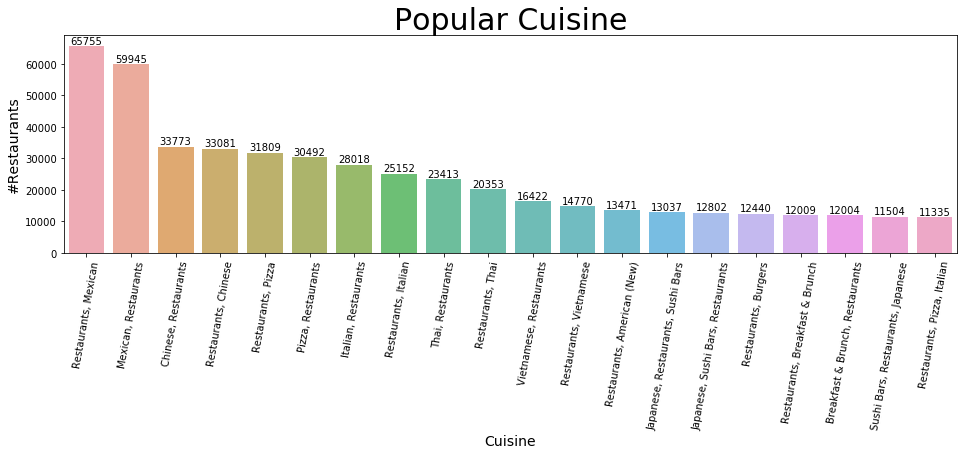

In [16]:
#Created a graph for top categories

x=df['categories'].value_counts()
print(f'There are {len(x)} different types of restaurants in Yelp')

#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Popular Cuisine", fontsize=30)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('#Restaurants', fontsize=14)
plt.xlabel('Cuisine', fontsize=14)

#adding the text labels
rets = ax.patches
labels = x.values
for rect, label in zip(rets, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom')

plt.show()
        

In [17]:
df['categories'].value_counts()

Restaurants, Mexican                                                                                                  65755
Mexican, Restaurants                                                                                                  59945
Chinese, Restaurants                                                                                                  33773
Restaurants, Chinese                                                                                                  33081
Restaurants, Pizza                                                                                                    31809
Pizza, Restaurants                                                                                                    30492
Italian, Restaurants                                                                                                  28018
Restaurants, Italian                                                                                                  25152
Thai, Re

## City with the Most Reviews

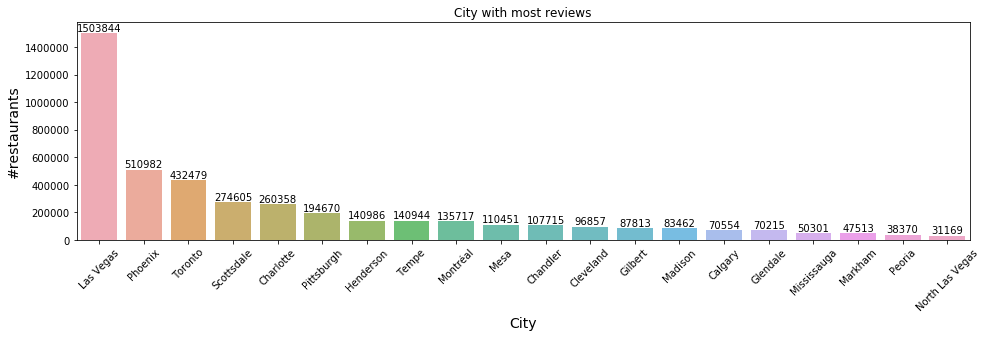

In [18]:
#Sort city from top to bottom by rating counts
x=df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("City with most reviews")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('#restaurants', fontsize=14)
plt.xlabel('City', fontsize=14)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()    

# Previous Tally-ai EDA LAPS19

## Review Info

In [19]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'postal_code', 'state', 'stars_business', 'date',
       'review_id', 'text', 'user_id', 'stars_review', 'name_reviews',
       'review_count_reviews', 'cool_reviews', 'funny_reviews',
       'useful_reviews', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite',
       'fans', 'friends', 'yelping_since', 'name_users', 'review_count_users',
       'cool_users', 'funny_users', 'useful_users'],
      dtype='object')

In [25]:
print(df['business_id'].value_counts())

# there are 63944 restaurants 

# review text will be the focus of NLP

RESDUcs7fIiihp38-d6_6g    10417
4JNXUYY8wbaaDmk3BPzlWw     9536
K7lWdNUhCbcnEvI0NhGewg     7594
f4x1YBxkLrZg652xt2KR5g     6859
cYwJA2A6I12KNkm2rtXd5g     5586
DkYS3arLOhA8si5uUEmHOw     5370
faPVqws-x-5k2CQKDNtHxw     4979
5LNZ67Yw9RD6nf4_UhXOjw     4973
2weQS-RnoOBhb1KsHKyoSQ     4953
iCQpiavjjPzJ5_3gPD5Ebg     4882
AV6weBrZFFBfRGCbcRGO4g     4819
vHz2RLtfUMVRPFmd7VBEHA     4801
ujHiaprwCQ5ewziu0Vi9rw     4731
El4FC8jcawUVgw_0EIcbaQ     4589
QXV3L_QFGj8r6nWX2kS2hA     4357
rcaPajgKOJC2vo_l3xa42A     4305
JDZ6_yycNQFTpUZzLIKHUg     4225
OETh78qcgDltvHULowwhJg     4217
3kdSl5mo9dWC4clrQjEDGg     4125
YJ8ljUhLsz6CtT_2ORNFmg     4119
KskYqH1Bi7Z_61pH6Om8pg     4119
RwMLuOkImBIqqYj4SSKSPg     4088
eoHdUeQDNgQ6WYEnP2aiRw     3992
Wxxvi3LZbHNIDwJ-ZimtnA     3970
XXW_OFaYQkkGOGniujZFHg     3859
HhVmDybpU7L50Kb5A0jXTg     3841
XZbuPXdyA0ZtTu3AzqtQhg     3614
hihud--QRriCYZw1zZvW4g     3611
utIA0LyQmwP-9DRyxUe6qQ     3608
eAc9Vd6loOgRQolMXQt6FA     3569
                          ...  
Z04TT_wP

In [26]:
print(df['user_id'].value_counts())

# there are 1399916 users 

# review text will be the focus of NLP

CxDOIDnH8gp9KXzpBHJYXw    2785
bLbSNkLggFnqwNNzzq-Ijw    1671
ELcQDlf69kb-ihJfxZyL0A    1607
U4INQZOPSUaj8hMjLlZ3KA    1264
PKEzKWv_FktMm2mGPjwd0Q    1135
d_TBs6J3twMy9GChqUEXkg    1127
DK57YibC5ShBmqQl97CKog    1120
cMEtAiW60I5wE_vLfTxoJQ     997
V-BbqKqO8anwplGRx9Q5aQ     873
UYcmGbelzRa0Q6JqzLoguw     796
Lfv4hefW1VbvaC2gatTFWA     775
O3pSxv1SyHpY4qi4Q16KzA     775
QJI9OSEn6ujRCtrX06vs1w     769
L8P5OWO1Jh4B2HLa1Fnbng     754
rCWrxuRC8_pfagpchtHp6A     727
MMf0LhEk5tGa1LvN7zcDnA     727
U5YQX_vMl_xQy8EQDqlNQQ     708
ic-tyi1jElL_umxZVh8KNA     691
3nDUQBjKyVor5wV0reJChg     679
2e5V6M4GNufEnbGJpVdCjw     675
iDlkZO2iILS8Jwfdy7DP9A     674
n86B7IkbU20AkxlFX_5aew     672
hWDybu_KvYLSdEFzGrniTw     669
YBT3EKUNN4IP8m4x7sGu1g     664
Q9mA60HnY87C1TW5kjAZ6Q     664
orh0HRUNCWuQMt9Iia_osg     659
WeVkkF5L39888IPPlRhNpg     655
Xxvz5g67eaCr3emnkY5M6w     655
M9rRM6Eo5YbKLKMG5QiIPA     650
dIIKEfOgo0KqUfGQvGikPg     643
                          ... 
LEkZCyuRqhVMdbWB-OykJQ       1
bFSzEhqx

In [27]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'postal_code', 'state', 'stars_business', 'date',
       'review_id', 'text', 'user_id', 'stars_review', 'name_reviews',
       'review_count_reviews', 'cool_reviews', 'funny_reviews',
       'useful_reviews', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite',
       'fans', 'friends', 'yelping_since', 'name_users', 'review_count_users',
       'cool_users', 'funny_users', 'useful_users'],
      dtype='object')

In [28]:
print(df['postal_code'].value_counts())
print(df['state'].value_counts())

# there are 10944 zip codes 

# These are the states
#
#NV     1688628
#AZ     1442738
#ON      668862
#NC      340882
#OH      273514
#PA      248253
#QC      161133
#WI      106379
#AB       71907
#IL       32327
#SC       19766
#TX        1098
#NY         128
#CA          95
#AR          60
#HI          51
#CO          45
#MB          36
#VA          27
#NE          18
#FL          10
#OR           9
#BC           6
#VT           5
#WY          5
#AL           4
#WA           3
#HPL          3

89109      486875
85251       98916
89119       96939
89102       90851
85281       80845
89103       74310
89101       72361
89146       66458
89123       53760
85016       53121
85004       51094
89117       48611
89147       46072
89169       45277
89052       45231
85018       43583
15222       43360
89014       42026
53703       40476
85254       39506
89139       38788
89118       37947
85260       36587
28202       36518
89104       36248
85308       32913
44113       32710
89135       32599
28203       32082
85226       31890
            ...  
T2P 5E9         3
T2P 0J8         3
M9N 2A4         3
L6P 0K4         3
M6H 4K3         3
M1M 1R9         3
L6R 1Z1         3
M5J 1E7         3
M9V 5G6         3
H2G 1T8         3
M2R 1X9         3
H2G 1B2         3
H1G 2Z2         3
L1Z 2C9         3
M8Z 6A8         3
L4K 4S6         3
J5R 0A1         3
L5S 1X2         3
L5N 6B9         3
H7K 2K5         3
M9V 5H4         3
J5R 2L6         3
J3H 6C3         3
H8R 3H9         3
J5R 0B4   

In [30]:
mean_reviews = df['average_stars'].mean()

In [31]:
mean_reviews

3.7462366633539683

average stars: 3.7311014337048003


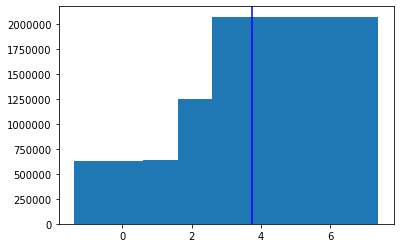

In [34]:
df_tmp = df['stars_review']\
    .value_counts().reset_index()\
    .sort_values('index')
mean_stars = df['stars_review'].mean()
print('average stars:', mean_stars)
plt.bar(df_tmp['index'], df_tmp['stars_review'])
plt.axvline(mean_stars, c='b');
# wild guess:
# 1 and 5 stars are more inluenced by emotions
# 2-4 stars are relatively less influenced?

In [36]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'postal_code', 'state', 'stars_business', 'date',
       'review_id', 'text', 'user_id', 'stars_review', 'name_reviews',
       'review_count_reviews', 'cool_reviews', 'funny_reviews',
       'useful_reviews', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite',
       'fans', 'friends', 'yelping_since', 'name_users', 'review_count_users',
       'cool_users', 'funny_users', 'useful_users'],
      dtype='object')

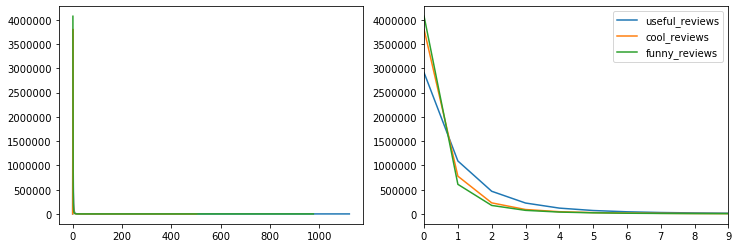

In [37]:
cols = ['useful_reviews', 'cool_reviews', 'funny_reviews']
def plot1(colname):
    df_tmp = df[colname]\
        .value_counts().reset_index()\
        .sort_values('index')
    plt.plot(df_tmp['index'], df_tmp[colname])    

def plot2(colname):
    df_tmp = df[colname]\
        .value_counts().reset_index()\
        .sort_values('index')
    df_tmp = df_tmp[df_tmp['index']<10]
    plt.plot(df_tmp['index'], df_tmp[colname])

plt.figure(figsize=(12,4))    
plt.subplot(121)
for col in cols:
    plot1(col)    
plt.subplot(122)   
plt.xlim(0,9)
for col in cols:
    plot2(col)
plt.legend(cols);  
# all 3 review feedbacks have a long tail
# "funny" and "cool" have very similar shapes

## Datetime

In [27]:
df['datetime'] = pd.to_datetime(df['date'])
df['datetime'].describe()
# the timespan is about 14 years

count                 5055992
unique                4988798
top       2014-07-28 05:36:33
freq                        7
first     2004-10-12 10:13:32
last      2019-12-13 15:50:49
Name: datetime, dtype: object

In [28]:
df['year'] = df['datetime'].apply(lambda x: x.year)
df['month'] = df['datetime'].apply(lambda x: x.month)
df['day'] = df['datetime'].apply(lambda x: x.day)
df['hour'] = df['datetime'].apply(lambda x: x.hour)
df['weekday'] = df['datetime'].apply(lambda x: x.weekday())

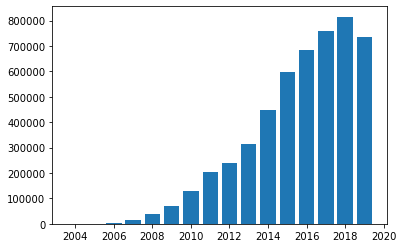

In [41]:
df_tmp = df['year'].value_counts().reset_index()
plt.bar(df_tmp['index'], df_tmp['year']);
# it was growing till 2017

In [ ]:
df_tmp = df['month'].value_counts().reset_index()
plt.bar(df_tmp['index'], df_tmp['month']);
# monthly number of reviews are not very different

In [ ]:
df_tmp = df['hour'].value_counts().reset_index()
plt.bar(df_tmp['index'], df_tmp['hour']);
# around 10 am users left the lest number of reviews... lol
# also from the business.csv we could see that 
# all data are about the US region

In [ ]:
df_tmp = df['weekday'].value_counts().reset_index()
plt.bar(df_tmp['index'], df_tmp['weekday']);
# review numbers are slightly different for weekdays

In [42]:
types = df['text'].apply(lambda x: type(x))
types.value_counts()
# this is interesting... 
# sthere are 2 floats among all the strings.

<class 'str'>    5055992
Name: text, dtype: int64

In [47]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'postal_code', 'state', 'stars_business', 'date',
       'review_id', 'text', 'user_id', 'stars_review', 'name_reviews',
       'review_count_reviews', 'cool_reviews', 'funny_reviews',
       'useful_reviews', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite',
       'fans', 'friends', 'yelping_since', 'name_users', 'review_count_users',
       'cool_users', 'funny_users', 'useful_users', 'datetime', 'year',
       'month', 'day', 'hour', 'weekday'],
      dtype='object')

## Text Length

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df['text_length'] = df['text'].fillna('').apply(lambda x: len(x))
df['text'].describe()

count                                               5055992
unique                                              5043522
top       Impressive food and service...\nLove the new T...
freq                                                      8
Name: text, dtype: object

In [20]:
df['text_length'] = df['text'].str.len()

In [21]:
df['text_length']

index
0         304
1         414
2         482
3         592
4         816
5         147
6         213
7        1016
8         180
9         208
10        741
11        161
12       1774
13        351
14       1351
15       2273
16        690
17       1995
18        721
19        442
20        243
21        194
22       1028
23        555
24        321
25        520
26        542
27        569
28       1114
29        497
         ... 
24723     154
24724     134
24725     248
24726     526
24727     607
24728     377
24729     162
24730    1738
24731      94
24732     160
24733     345
24734     862
24735    3123
24736     277
24737     139
24738     479
24739     190
24740     659
24741      98
24742     268
24743     301
24744     190
24745     366
24746     534
24747     333
24748     683
24749     325
24750     648
24751    1392
24752    1222
Name: text_length, Length: 5055992, dtype: int64

In [22]:
mean_length = df['text_length'].mean()
print(mean_length)

569.620501970731


In [24]:
df['text_length'].describe()

count    5.055992e+06
mean     5.696205e+02
std      5.358049e+02
min      1.000000e+00
25%      2.220000e+02
50%      3.990000e+02
75%      7.270000e+02
max      5.000000e+03
Name: text_length, dtype: float64

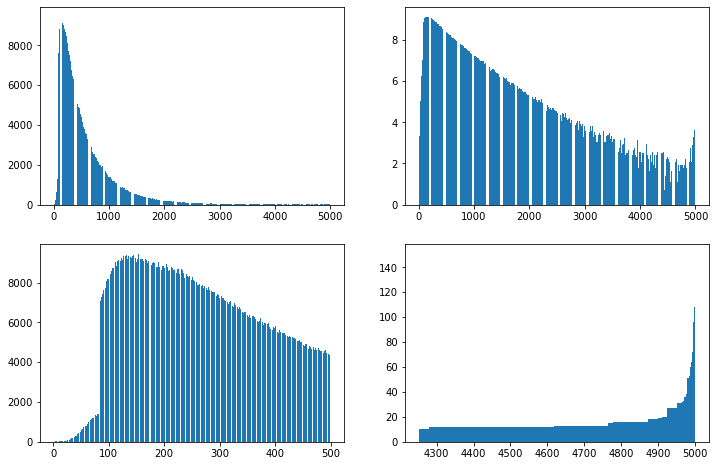

In [25]:
df_tmp = df['text_length'].value_counts().reset_index()
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.bar(df_tmp['index'], df_tmp['text_length'])
plt.subplot(222)
plt.bar(df_tmp['index'], np.log(df_tmp['text_length']))
plt.subplot(223)
df_tmp1 = df_tmp[df_tmp['index']<500]
plt.bar(df_tmp1['index'], df_tmp1['text_length'])
plt.subplot(224)
df_tmp = df_tmp[df_tmp['index']>4500]
plt.bar(df_tmp['index'], df_tmp['text_length']);
# this is a very interesting distribution
# there is a discontinuity around 80(?) characters.
# it might be caused by the old limit of review length
# we could exam the text length time series.

## Monthly Max Text Length

In [30]:
from datetime import datetime

# 4 records have NA value in the 'date' column
years = df['year'].dropna().unique().astype(int)
months = np.arange(1, 13, 1)
lengths = []
for year in years:
    for month in months:
        condition = ((df['year']==year) &
            (df['month']==month))
        length = df[condition]['text_length'].max()
        lengths.append([year, month, length])
lengths = pd.DataFrame(lengths, columns=['year', 'month', 'maximum'])
lengths = lengths.dropna().sort_values(['year', 'month'])
lengths['date'] = lengths.apply(lambda x: 
    datetime.strptime(
        str(int(x['year']))+str(int(x['month'])).zfill(2)+'01', 
        '%Y%m%d'),
    axis=1)
lengths

,year,month,maximum,date
189,2004,10,140.0,2004-10-01
191,2004,12,826.0,2004-12-01
168,2005,1,188.0,2005-01-01
169,2005,2,226.0,2005-02-01
170,2005,3,819.0,2005-03-01
171,2005,4,1517.0,2005-04-01
172,2005,5,1320.0,2005-05-01
173,2005,6,1354.0,2005-06-01
174,2005,7,1996.0,2005-07-01
175,2005,8,829.0,2005-08-01


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


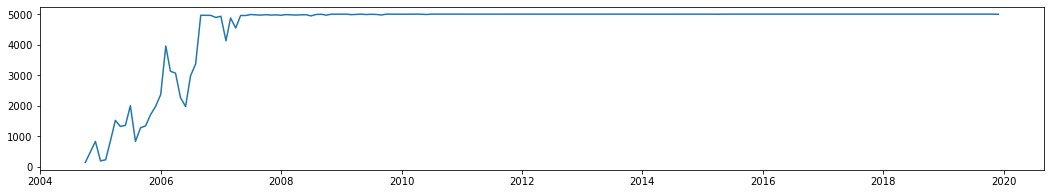

In [31]:
# monthly maximum length of reviews
plt.figure(figsize=(18, 3))
plt.plot(lengths['date'], lengths['maximum']);

## Sample of Text > 4000 Chars

In [32]:
# sample a review longer than 4,000 characters
print(df[df['text_length']>4000]['text'].sample().values[0])

Thank you for the personal reply, Mr. Roman. 

We came in for our usual once a week venture and sat at the bar. As I mentioned in the first review, I'm not a big fan of Dutch as my bartender. He was distracted, inattentive, and this time around, rude. I do not drink alcohol. I have a medical condition that keeps me from doing so.  He always treats me as a waste of a bar stool bc I do not order alcohol. My boyfriend ordered his beer, and I ordered my usual iced tea, to which Dutch sighed and not so quietly muttered, "Figures."  Regardless of my reason for not drinking, it was rude and offensive.  I was so infuriated that he was openly passing judgment on me to my face. I wanted to leave then, but my boyfriend wanted to have dinner, drinks, and watch the baseball game.

We asked for menus. They never came. We asked again. He finally gave them to us, and never came back to check to see if we were ready.  I finally flagged him down to place an order to which he walked away and left the bar

In [33]:
df['text_length'].max()


5000

In [34]:
#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap


#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict

ModuleNotFoundError: No module named 'folium'